<a href="https://colab.research.google.com/github/ForhanShahriarFahim/Artificial-Intelligence-Lab/blob/master/Updated_Binary_classifier(Assignment_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow import keras

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
train_dir = '/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/train'
validation_dir = '/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/validation'
test_dir = '/content/drive/Shareddrives/CSE-RU 27/Set/Latest Dataset/test'
# train_dir = "./Latest Dataset/train"
# validation_dir = "./Latest Dataset/validation"
# test_dir = "./Latest Dataset/test"

In [14]:
# Define constants
IMAGE_WIDTH, IMAGE_HEIGHT = 150, 150
NUM_EPOCHS = 10
# Train the model
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=32,
    class_mode='binary',  # Change to 'categorical' if you have more than two classes
    shuffle=True,
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=32,
    class_mode='binary',  # Change to 'categorical' if you have more than two classes
    shuffle=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=32,
    class_mode='binary',  # Change to 'categorical' if you have more than two classes
    shuffle=True,
)

Found 1102 images belonging to 2 classes.
Found 110 images belonging to 2 classes.
Found 220 images belonging to 2 classes.


In [15]:
print(test_generator.class_indices)
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'Badam': 0, 'Chola': 1}
{'Badam': 0, 'Chola': 1}
{'Badam': 0, 'Chola': 1}


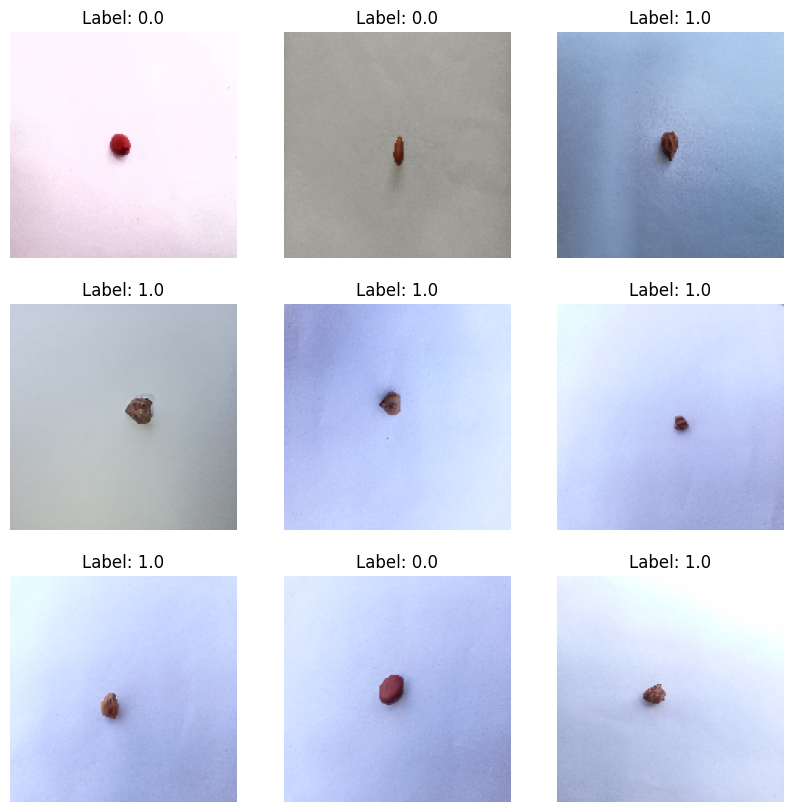

In [16]:
# Display 9 images from the train set
sample_images, sample_labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):  # Change the range to 9
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    plt.title(f'Label: {sample_labels[i]}')
    plt.axis('off')
plt.show()

### Number of Train Test & validation


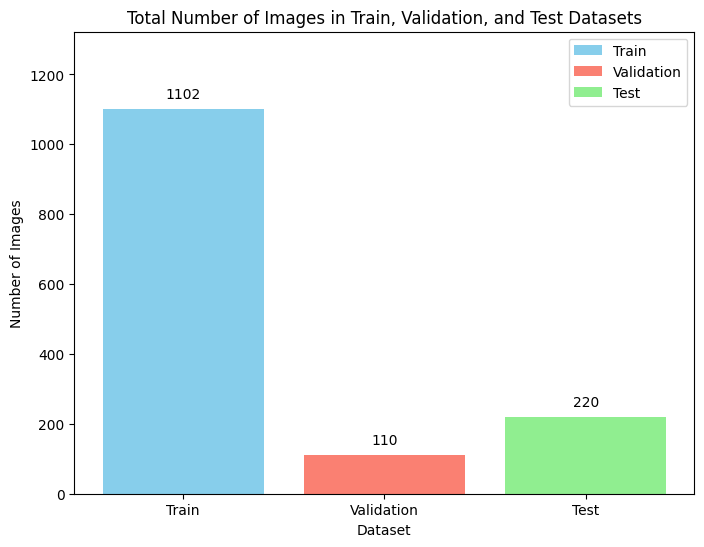

In [17]:

# Get the number of images in each directory
num_train = train_generator.n
num_validation = validation_generator.n
num_test = test_generator.n

# Create labels and values for the bar chart
labels = ["Train", "Validation", "Test"]
values = [num_train, num_validation, num_test]

# Define colors for each dataset
colors = ["skyblue", "salmon", "lightgreen"]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors)
plt.xlabel("Dataset")
plt.ylabel("Number of Images")
plt.title("Total Number of Images in Train, Validation, and Test Datasets")
plt.ylim(0, max(values) * 1.2)  # Adjust the y-axis limits for better visualization
for i, v in enumerate(values):
    plt.text(i, v + max(values) * 0.02, str(v), ha="center", va="bottom")

# Add legend
plt.legend(bars, labels, loc="upper right")

plt.show()

### Number of object each class

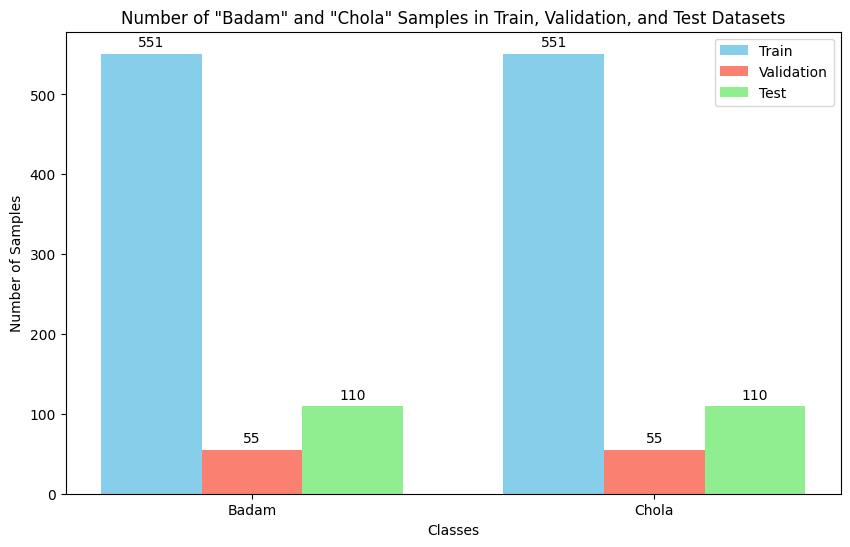

In [18]:

# Define the classes you are interested in
classes_of_interest = ["Badam", "Chola"]


# Function to count images in each class for a given directory
def count_images(directory, classes):
    class_counts = {class_name: 0 for class_name in classes}

    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        if os.path.exists(class_dir):
            class_counts[class_name] = len(os.listdir(class_dir))

    return class_counts


# Count images for the specific classes in train, validation, and test sets
train_class_counts = count_images(train_dir, classes_of_interest)
validation_class_counts = count_images(validation_dir, classes_of_interest)
test_class_counts = count_images(test_dir, classes_of_interest)

# Create labels and values for the bar chart
labels = classes_of_interest
values_train = [train_class_counts[class_name] for class_name in classes_of_interest]
values_validation = [
    validation_class_counts[class_name] for class_name in classes_of_interest
]
values_test = [test_class_counts[class_name] for class_name in classes_of_interest]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.25
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, values_train, color="skyblue", width=bar_width, label="Train")
plt.bar(r2, values_validation, color="salmon", width=bar_width, label="Validation")
plt.bar(r3, values_test, color="lightgreen", width=bar_width, label="Test")

plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.title(
    'Number of "Badam" and "Chola" Samples in Train, Validation, and Test Datasets'
)
plt.xticks([r + bar_width for r in range(len(labels))], labels)
plt.legend()

# Add labels on the bars
for i, value in enumerate(values_train):
    plt.text(
        i, value + 5, str(value), ha="center", va="bottom", color="black", fontsize=10
    )
for i, value in enumerate(values_validation):
    plt.text(
        i + bar_width,
        value + 5,
        str(value),
        ha="center",
        va="bottom",
        color="black",
        fontsize=10,
    )
for i, value in enumerate(values_test):
    plt.text(
        i + 2 * bar_width,
        value + 5,
        str(value),
        ha="center",
        va="bottom",
        color="black",
        fontsize=10,
    )

plt.show()

### Build Custom CNN Model Architecture

In [19]:

# Define the input shape of our images
input_shape = (
    150,
    150,
    3,
)  # Assuming images are resized to 150x150 pixels and have 3 color channels (RGB)

# Input layer
inputs = Input(shape=input_shape)

# First convolutional layer
x = Conv2D(32, (3, 3), activation="relu")(inputs)
x = MaxPooling2D((2, 2))(x)

# Second convolutional layer
x = Conv2D(64, (3, 3), activation="relu")(x)
x = MaxPooling2D((2, 2))(x)

# Third convolutional layer
x = Conv2D(128, (3, 3), activation="relu")(x)
x = MaxPooling2D((2, 2))(x)

# Flatten the output
x = Flatten()(x)

# Dropout for regularization
x = Dropout(0.5)(x)

# Dense layer with 512 units
x = Dense(512, activation="relu")(x)

# Output layer with sigmoid activation for binary classification
outputs = Dense(1, activation="sigmoid")(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Print the summary of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856 

In [20]:
input_shape = (150, 150, 3)
inputs = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation="relu")(inputs)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(64, (3, 3), activation="relu")(x)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(128, (3, 3), activation="relu")(x)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(128, (3, 3), activation="relu")(x)
x = MaxPooling2D(2, 2)(x)
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
outputs = Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.summary()

# input_shape = (32, 32, 1)
# inputs = Input(shape=input_shape)

# # Convolutional layers
# x = Conv2D(32, (3, 3), activation="relu")(inputs)
# x = MaxPooling2D(2, 2)(x)
# x = Conv2D(64, (3, 3), activation="relu")(x)
# x = MaxPooling2D(2, 2)(x)
# x = Conv2D(128, (3, 3), activation="relu")(x)
# x = MaxPooling2D(2, 2)(x)

# # Flatten and dense layers
# x = Flatten()(x)
# x = Dense(128, activation="relu")(x)

# # Output layer for binary classification (1 neuron with sigmoid activation)
# outputs = Dense(1, activation="sigmoid")(x)

# # Create the model
# model = keras.Model(inputs=inputs, outputs=outputs)

# # Compile the model
# model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# # Display model summary
# model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       7385

In [21]:
history = model.fit(
    train_generator,
    epochs=NUM_EPOCHS,
    validation_data=validation_generator
)

Epoch 1/10
35/35 [==============================] - 168s 5s/step - loss: 0.6527 - accuracy: 0.6289 - val_loss: 0.4888 - val_accuracy: 0.8909
Epoch 2/10
35/35 [==============================] - 99s 3s/step - loss: 0.4299 - accuracy: 0.8294 - val_loss: 0.2666 - val_accuracy: 0.9182
Epoch 3/10
35/35 [==============================] - 87s 2s/step - loss: 0.1981 - accuracy: 0.9256 - val_loss: 0.1480 - val_accuracy: 0.9545
Epoch 4/10
35/35 [==============================] - 89s 3s/step - loss: 0.1569 - accuracy: 0.9419 - val_loss: 0.1499 - val_accuracy: 0.9727
Epoch 5/10
35/35 [==============================] - 82s 2s/step - loss: 0.0978 - accuracy: 0.9628 - val_loss: 0.0805 - val_accuracy: 0.9818
Epoch 6/10
35/35 [==============================] - 95s 3s/step - loss: 0.0789 - accuracy: 0.9710 - val_loss: 1.5434 - val_accuracy: 0.6545
Epoch 7/10
35/35 [==============================] - 101s 3s/step - loss: 0.0689 - accuracy: 0.9755 - val_loss: 0.0327 - val_accuracy: 0.9909
Epoch 8/10
35/35 [

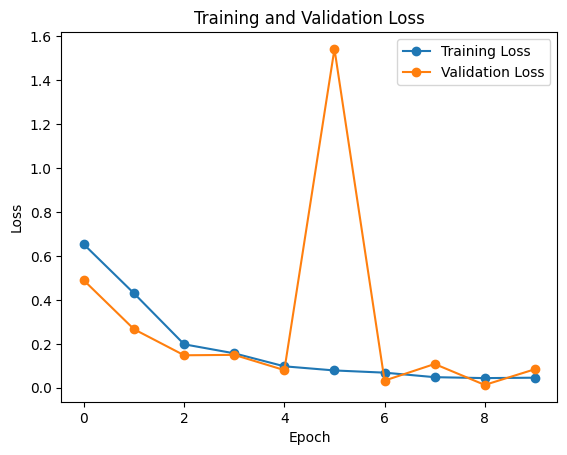

In [23]:
plt.plot(history.history['loss'],  '-o',  label='Training Loss')
plt.plot(history.history['val_loss'], '-o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# plt.savefig('CNN_Training_and_Validation_Loss.png')
plt.show()

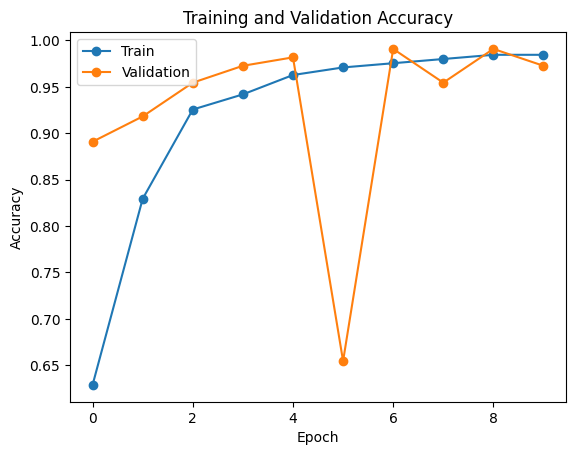

In [24]:
plt.plot(history.history['accuracy'], '-o')
plt.plot(history.history['val_accuracy'], '-o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
# plt.savefig('CNN_Training_and_Validation_Accuracy.png')
plt.show()

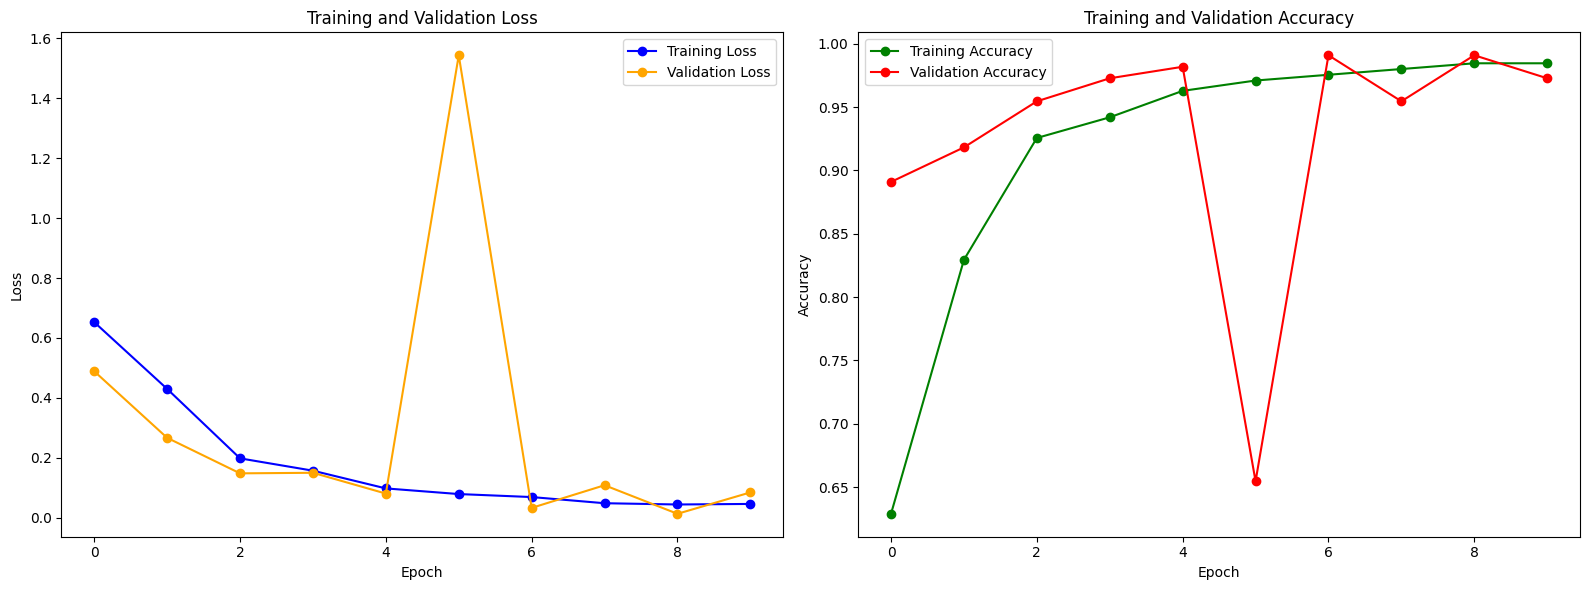

In [30]:
plt.figure(figsize=(16, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], '-o', label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], '-o', label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], '-o', label='Training Accuracy', color='green')
plt.plot(history.history['val_accuracy'], '-o', label='Validation Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [27]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy:", test_acc)

7/7 [==============================] - 141s 23s/step - loss: 0.1050 - accuracy: 0.9727
Test accuracy: 0.9727272987365723


7/7 [==============================] - 14s 2s/step


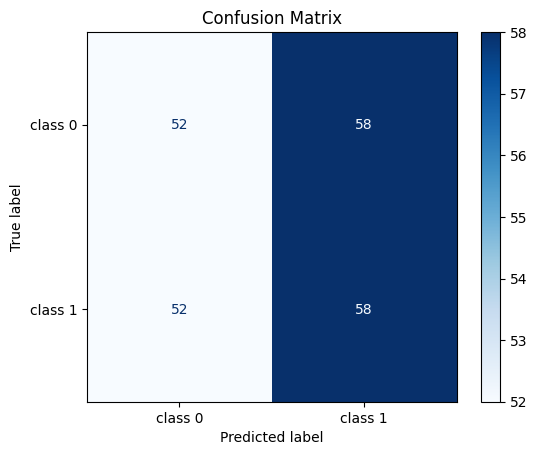

In [28]:
# Make predictions on the test data
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int)

# Get the true labels from the test data generator
true_classes = test_generator.classes

# Calculate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['class 0', 'class 1'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
